# Visualizing Earnings Based On College Majors

This analysis is based of data collected from students who graduated from college between 2010 and 2012. This dataset comes from the [American Community Survey](https://www.census.gov/programs-surveys/acs).
<br>
<br>
Lets begin by importing our modules and our dataset as a dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
grads_df = pd.read_excel('C:/Users/Jason Minhas/Jupyter Projects/Visualizing Earnings Based On College Majors/Dataset/visualizing_earnings_based_on_college_majors.xlsx')

# Objective
---
The objective with this dataset are to investigate the following questions:
<br>
1) What are the most popular major categories?
<br>
2) What is the highest paying major category?
<br>
3) What are the top majors for women and men?
<br>
4) What is the relationship between salary and unemployment rate?
<br>
5) What is the relationship between major and unemployment rate?
<br>

In [3]:
grads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

Here's a description of each 

- **Rank** - Rank by median earnings
- **Major_code** - Major code
- **Major** - Major description
- **Major_category** - Category of major
- **Total** - Total number of people with major
- **Sample_size** - Sample size (unweighted) of full-time
- **Men** - Male graduates
- **Women** - Female graduates
- **ShareWomen** - Women as share of total
- **Employed** - Number employed
- **Median** - Median salary of full-time, year-round workers
- **Low_wage_jobs** - Number in low-wage service jobs
- **Full_time** - Number employed 35 hours or more
- **Part_time** - Number employed less than 35 hours

# Examine Dataset
---

First we will examine the dataset. This will allow us to ensure it's integrity and discover any caveats we will need to adjust for when we begin creating our visuals. We see from the <code>.info()</code> method above that some rows are missing datapoints. This is signified by the columns with 172 non-null instead of 173. Lets's begin by finding the row or rows with null datapoints.

In [4]:
# find row with missing datapoints
null_rows = grads_df[grads_df.isnull().any(axis=1)]
null_rows.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


We can see that for the Food Science major the Total, Men, Women and ShareWomen columns are missing values but the rest of the row has values in it. Some of our questions don't interact with the columns that are missing values so we'll leave the Food Science row in the dataset but we'll have to remove it when we incorporate those columns into our visuals.
<br>
<br>
Next we'll take a look at the integrety of our data to ensure that the numbers we're seeing are logical from a top-level view.

In [5]:
grads_df.describe().round(2)

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.00,173.00,172.00,172.00,172.00,172.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00
mean,87.00,3879.82,39370.08,16723.41,22646.67,0.52,356.08,31192.76,26029.31,8832.40,19694.43,2416.33,0.07,40151.45,29501.45,51494.22,12322.64,13284.50,3859.02
std,50.08,1687.75,63483.49,28122.43,41057.33,0.23,618.36,50675.00,42869.66,14648.18,33160.94,4112.80,0.03,11470.18,9166.01,14906.28,21299.87,23789.66,6945.00
min,1.00,1100.00,124.00,119.00,0.00,0.00,2.00,0.00,111.00,0.00,111.00,0.00,0.00,22000.00,18500.00,22000.00,0.00,0.00,0.00
25%,44.00,2403.00,4549.75,2177.50,1778.25,0.34,39.00,3608.00,3154.00,1030.00,2453.00,304.00,0.05,33000.00,24000.00,42000.00,1675.00,1591.00,340.00
50%,87.00,3608.00,15104.00,5434.00,8386.50,0.53,130.00,11797.00,10048.00,3299.00,7413.00,893.00,0.07,36000.00,27000.00,47000.00,4390.00,4595.00,1231.00
75%,130.00,5503.00,38909.75,14631.00,22553.75,0.70,338.00,31433.00,25147.00,9948.00,16891.00,2393.00,0.09,45000.00,33000.00,60000.00,14444.00,11783.00,3466.00
max,173.00,6403.00,393735.00,173809.00,307087.00,0.97,4212.00,307933.00,251540.00,115172.00,199897.00,28169.00,0.18,110000.00,95000.00,125000.00,151643.00,148395.00,48207.00


One item that stands out to me the most is the numeric columns with 0 as its minimum value. For example, the unemployed column has 0 as its minimumm value. This indicates there is at least one major that has 0 unemployed which I find hard to believe. Lets take a look at which row or rows have 0 as it's unemployment value. 

In [6]:
# find rows with 0 in unemployement column
zero_unemployed = grads_df[grads_df['Unemployed'] == 0]
zero_unemployed.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111


What I see in common with these rows is that they all have low sample sizes compared to the mean in the <code>describe()</code> method above. To verify if rows with 0 unemployed truly do have smaller sample sizes lets compare the average sample size for rows that are greater then or equal to 1 in the unemployed to row that are equal to 0 in the unemployed column.

In [7]:
# describe rows with 0 in unemployement column
zero_unemployed['Sample_size'].describe().round(2)

count    5.00
mean     5.80
std      2.17
min      4.00
25%      4.00
50%      5.00
75%      7.00
max      9.00
Name: Sample_size, dtype: float64

In [8]:
# find and describe rows that are greater then or equal to 1 in unemployment column
one_or_greater_unemployed = grads_df[grads_df['Unemployed'] >= 1]
one_or_greater_unemployed['Sample_size'].describe().round(2)

count     168.00
mean      366.51
std       624.53
min         2.00
25%        45.75
50%       142.00
75%       342.00
max      4212.00
Name: Sample_size, dtype: float64

Rows with 0 Unemployed average a sample size of about 6 whereas rows greater then or equal to 1 Unemployed average about 366. 
<br>
<br>
It seems like a small sample size is leading to inaccuracies in the data. Here's a [link](https://sciencing.com/determine-size-quantitative-research-study-8072459.html) to an article that explains the importance of sample sizes. To summerize, a small sample size can increases the margin of error and reduce the power of the analysis. This would render our findings meaningless depending on the analysis and visuals we create. This is something we'll keep in mind when creating or visuals.
<br>
<br>
## Examine Dataset Summary
Here are the two caveats we must take into consideration:
<br> 
1) The Food Science major row is missing values in the Total, Men, Women and ShareWomen columns.
<br>
2) Some rows have a small sample size whose datapoints may throw of results.
<br>

## Cleaning
---

Now that we know our caveats lets prepare the data for our visuals by cleaning our imported dataset. We have a ShareWomen column that is women as share of total. Let's create a ShareMen column that is men as share of total

In [9]:
grads_df['ShareMen'] = grads_df['Men'] / grads_df['Total']

# Create Visuals
---
### 1) What are the most popular major categories?


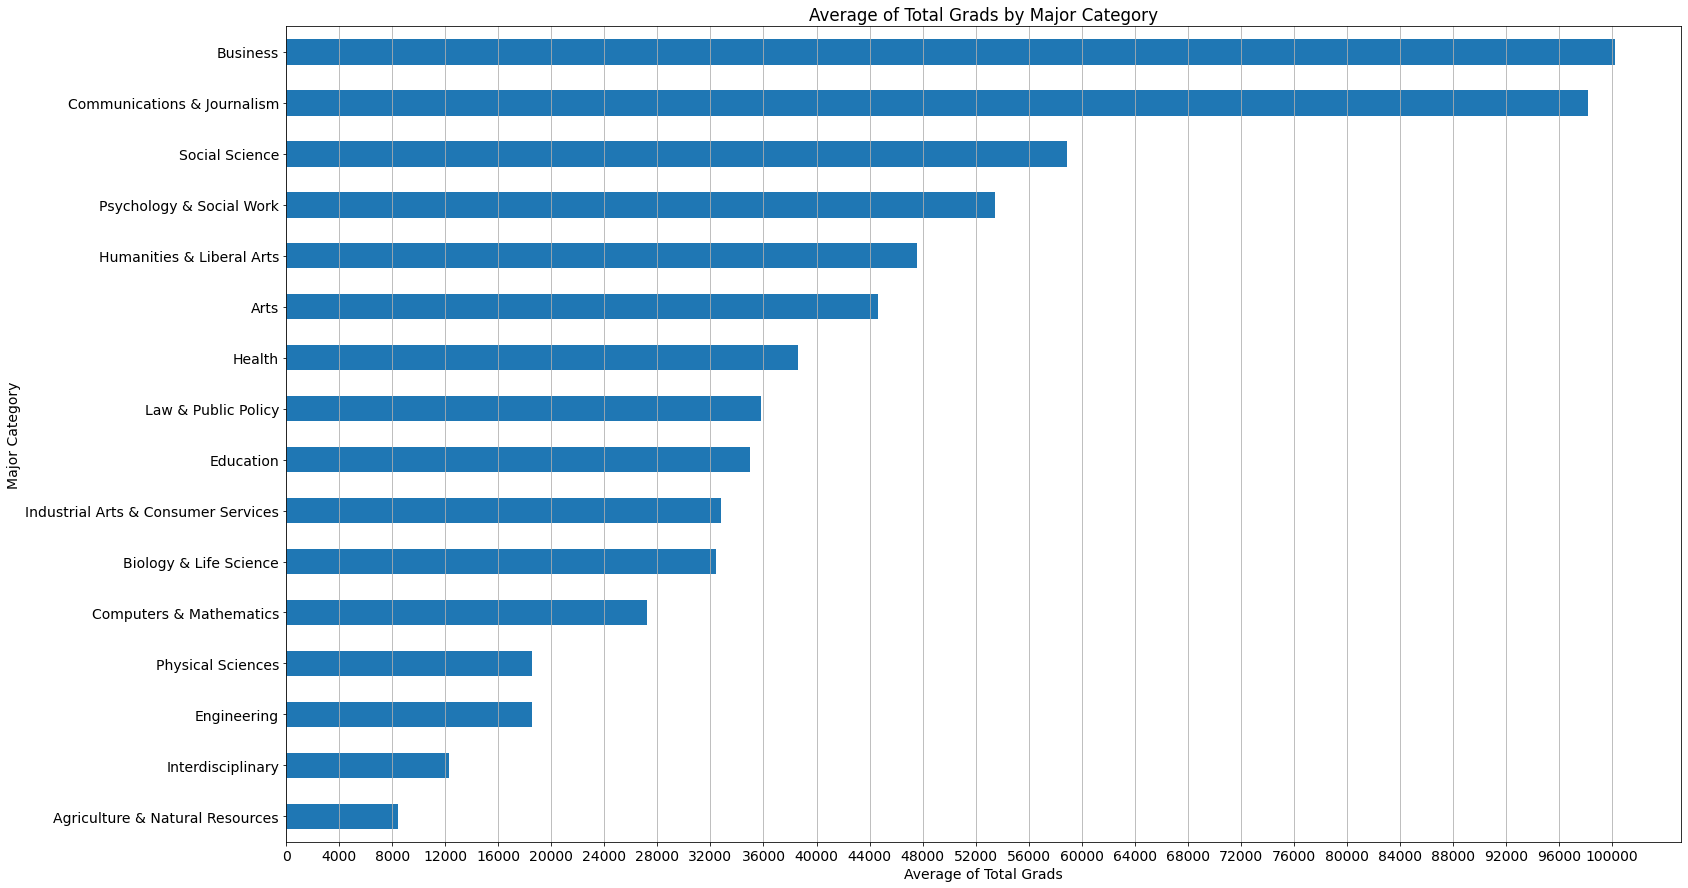

In [10]:
matplotlib.rcParams.update({'font.size': 14})
#  create pivot
major_category_pop_pvt = pd.pivot_table(grads_df, values='Total', index='Major_category', aggfunc={np.mean}).sort_values(by='mean')
# create bar plot
major_category_pop_barh = major_category_pop_pvt.plot(
                        kind='barh', 
                        figsize=(25,15), 
                        title='Average of Total Grads by Major Category', 
                        legend=False
                        )
major_category_pop_barh.set_ylabel("Major Category")
major_category_pop_barh.set_xlabel("Average of Total Grads")
major_category_pop_barh.set_xticks(np.arange(0,104000,4000).tolist())
major_category_pop_barh.grid(axis='x')


Business and 'Communications & Journalism' are the top 2 most popular major categories based on how many graduates there are. 'Humanities & Liberal Arts' and 'Pschology & Social Work' are the 2 least popular  major categories

### 2) What is the highest paying major category?


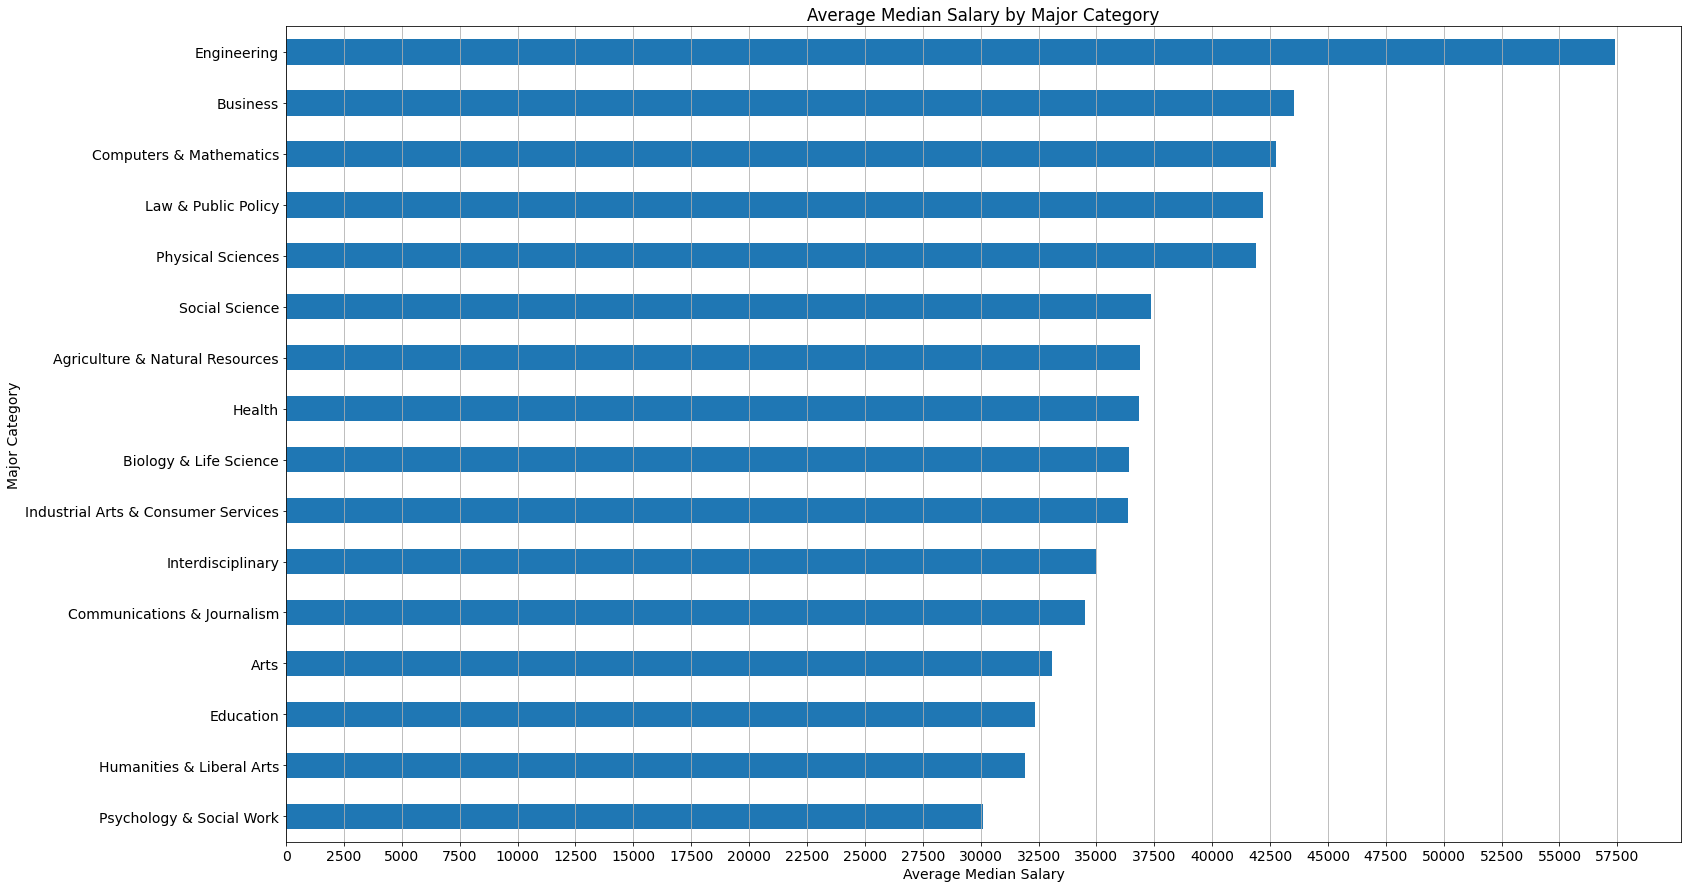

In [11]:
#  create pivot
major_category_pay_pvt = pd.pivot_table(grads_df, values='Median', index='Major_category', aggfunc={np.mean}).sort_values(by='mean')
# create bar plot
major_category_pay_barh = major_category_pay_pvt.plot(
                        kind='barh', 
                        figsize=(25,15), 
                        title='Average Median Salary by Major Category', 
                        legend=False
                        )
major_category_pay_barh.set_ylabel("Major Category")
major_category_pay_barh.set_xlabel("Average Median Salary")
major_category_pay_barh.set_xticks(np.arange(0,60000,2500).tolist(), )
major_category_pay_barh.grid(axis='x')

Engineering and Business are the top 2 most highest paid major categories based on graduates median salary. 'Humanities & Liberal Arts' and 'Pschology & Social Work' are the 2 lowest paid.
<br>
<br>
Interesting that the two lowest paid match the two least popular and Business is also on the top two of each bar chart. Let's see what kind of correlation there is between median salary and total grads.

Text(0.5, 0, 'Total Grads')

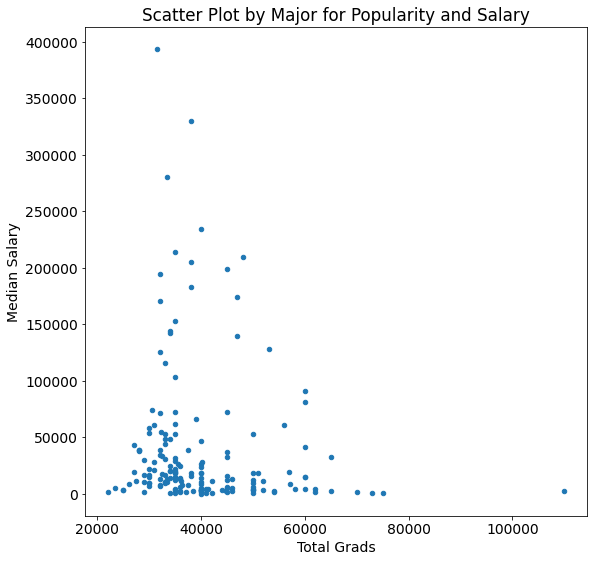

In [12]:
# correlation between median salary and popularity
major_category_pop_pay = grads_df[['Total', 'Median']]
# create scatter plot
major_category_pop_pay_scat = major_category_pop_pay.plot(
                            x='Median',
                            y='Total',
                            kind='scatter', 
                            figsize=(8,8), 
                            title='Scatter Plot by Major for Popularity and Salary', 
                            legend=False
                            )
major_category_pop_pay_scat.set_ylabel("Median Salary")
major_category_pop_pay_scat.set_xlabel("Total Grads")

There seems to be a slight inverse relation shop between total grads and media salary. This indicates that the majors with more graduates have a lower median pay. This might be because more grauates lead to a more saturated market causing demand for those skills to go down. 

### 3) What are the top majors for women and men?


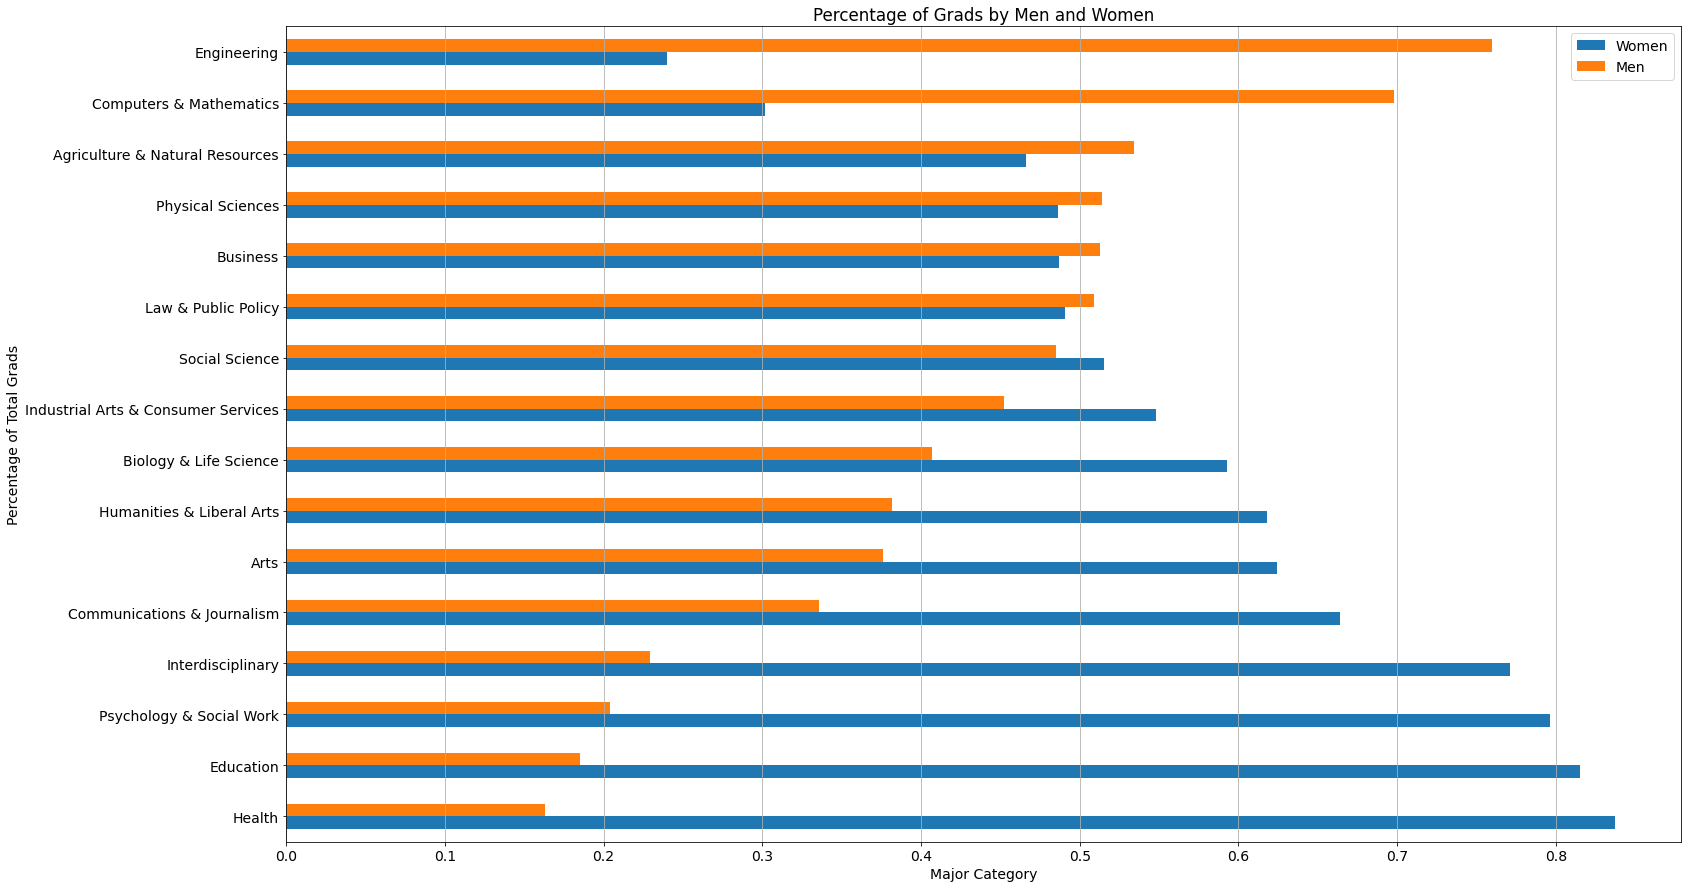

In [13]:
#  create pivot
major_category_total_pvt = pd.pivot_table(grads_df, values=['Total', 'Men', 'Women'], index='Major_category', aggfunc={np.sum})
major_category_total_pvt.columns = ['_'.join(col) for col in major_category_total_pvt.columns]

# get percentage by major market category
major_category_total_pvt['Men_sum'] = (major_category_total_pvt['Men_sum'] / major_category_total_pvt['Total_sum']).round(3)
major_category_total_pvt['Women_sum'] = (major_category_total_pvt['Women_sum'] / major_category_total_pvt['Total_sum']).round(3)
major_category_total_pvt = major_category_total_pvt.sort_values('Men_sum')

# create bar chart
major_category_total_barh = major_category_total_pvt.plot(
                            y=['Women_sum','Men_sum'],
                            kind='barh',
                            figsize=(25,15), 
                            title='Percentage of Grads by Men and Women', 
                            legend=True
                            )
major_category_total_barh.legend(['Women', "Men"])
major_category_total_barh.set_ylabel("Percentage of Total Grads")
major_category_total_barh.set_xlabel("Major Category")
major_category_total_barh.grid(axis='x')

### 4) What's the relationship between salary and unemployment rate?

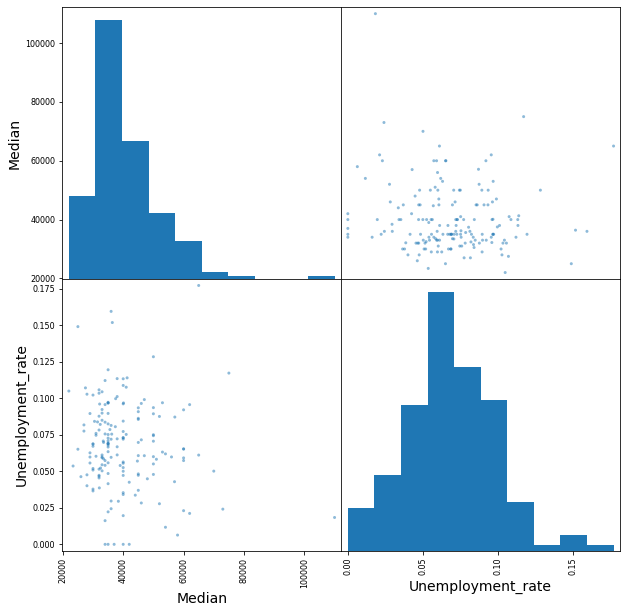

In [14]:
pay_unemploy_df = grads_df[['Median', 'Unemployment_rate']]
pay_unemploy_scat_matrix = pd.plotting.scatter_matrix(pay_unemploy_df, figsize=(9,9))

In the bar plot on the top left the median pay is skews left, no surprise there. When we take a look at the coorelationnbetween median pay and  unemployment rate there soent seem to be any coorelation. This indicates that salary gives no indication of unemployement rate.

### 5) What's the relationship between major and unemployment rate?

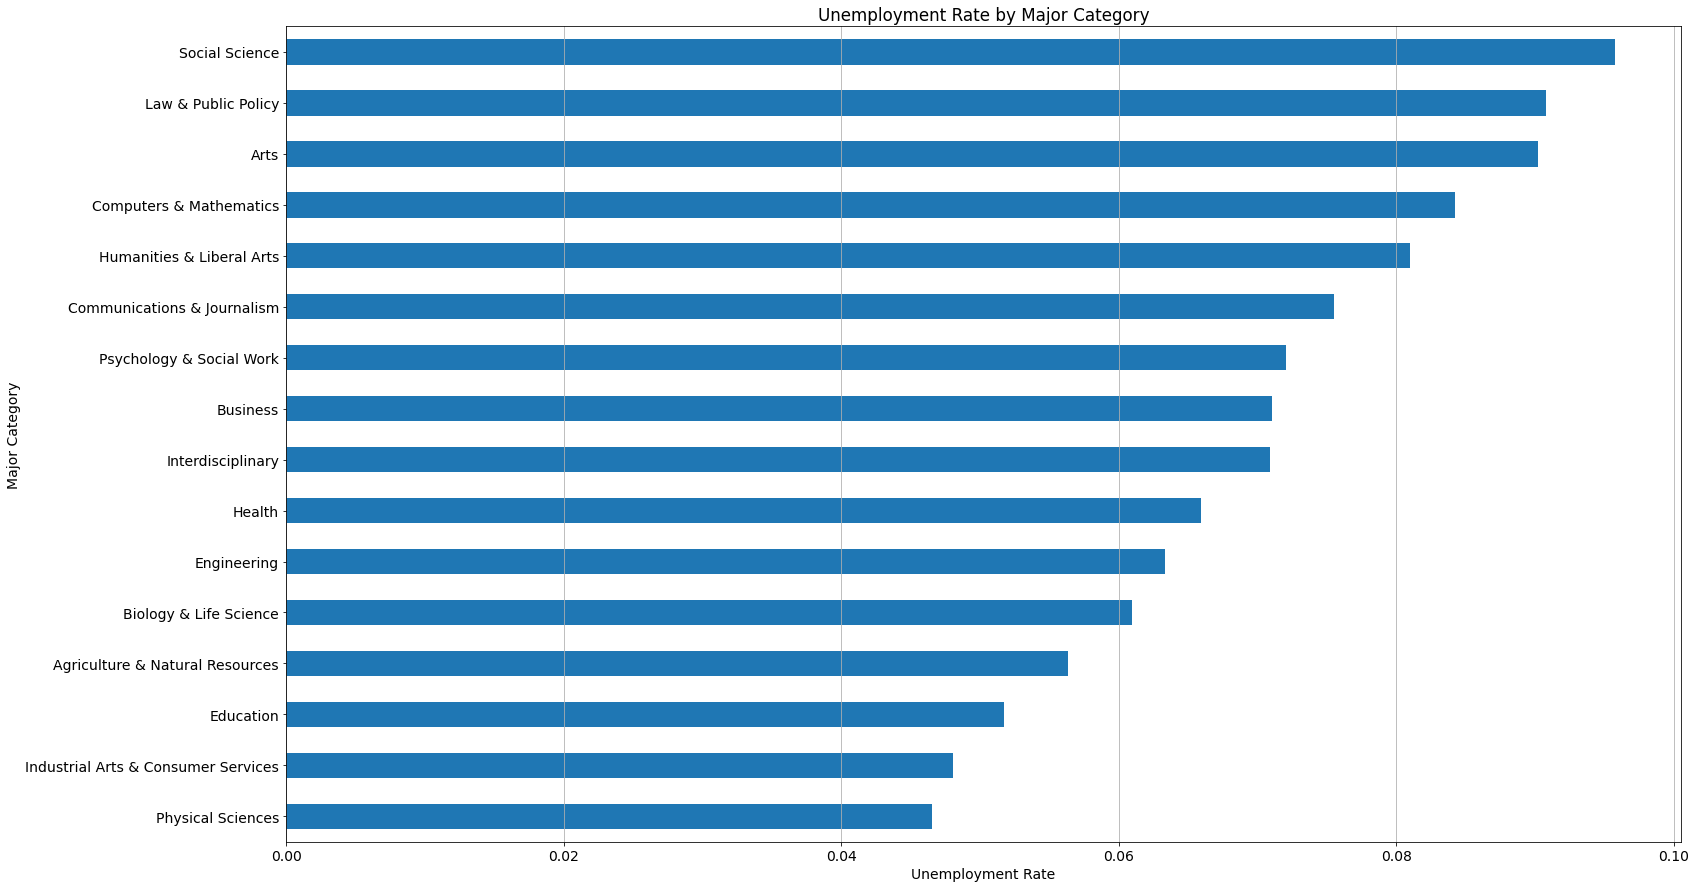

In [15]:
#  create pivot
pay_unemploy_pvt = pd.pivot_table(grads_df, values='Unemployment_rate', index='Major_category', aggfunc={np.mean}).sort_values(by='mean')
# create bar chart
pay_unemploy_barh = pay_unemploy_pvt.plot(
                            kind='barh',
                            figsize=(25,15), 
                            title='Unemployment Rate by Major Category',
                            legend=False
                            )
pay_unemploy_barh.set_ylabel("Major Category")
pay_unemploy_barh.set_xlabel("Unemployment Rate")
pay_unemploy_barh.grid(axis='x')

Social Science and 'Law & Public Policy' have the two highest unemployment rate.